In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process).shuffle(buffer_size=1000)
validation_ds = validation_ds.map(process)

In [4]:
# Preprocessing


# Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout added
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout added
model.add(Dense(1, activation='sigmoid'))

# Compile


C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'MaxPooling2D' is not defined

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)


In [ ]:
history

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping

# === Step 1: Load & Preprocess Dataset ===
image_size = (128, 128)
batch_size = 64

train_ds = image_dataset_from_directory(
    "train",      # ⬅️ change this to your train folder path
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

validation_ds = image_dataset_from_directory(
    "test",      # ⬅️ same path, reused for val split
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# === Step 2: Normalize Data ===
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(process).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.map(process).cache().prefetch(buffer_size=AUTOTUNE)

# === Step 3: Build Model ===
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# === Step 4: Compile Model ===
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


In [6]:
# === Step 5: Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# === Step 6: Train Model ===
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[early_stop])

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 119s 326ms/step - accuracy: 0.5804 - loss: 0.7231 - val_accuracy: 0.7050 - val_loss: 0.5791
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 296ms/step - accuracy: 0.7502 - loss: 0.5136 - val_accuracy: 0.7390 - val_loss: 0.5237
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 70s 281ms/step - accuracy: 0.8044 - loss: 0.4223 - val_accuracy: 0.7610 - val_loss: 0.5090
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 335ms/step - accuracy: 0.8581 - loss: 0.3286 - val_accuracy: 0.7720 - val_loss: 0.5114
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 276ms/step - accuracy: 0.9012 - loss: 0.2450 - val_accuracy: 0.7730 - val_loss: 0.5579


In [7]:
history.history

{'accuracy': [0.640500009059906,
  0.7558749914169312,
  0.8053749799728394,
  0.8543124794960022,
  0.9008749723434448],
 'loss': [0.6353397965431213,
  0.5012343525886536,
  0.4199586808681488,
  0.3345179855823517,
  0.24531300365924835],
 'val_accuracy': [0.7049999833106995,
  0.7390000224113464,
  0.7609999775886536,
  0.7720000147819519,
  0.7730000019073486],
 'val_loss': [0.5791284441947937,
  0.5237082242965698,
  0.5089964866638184,
  0.5113641619682312,
  0.5579224228858948]}

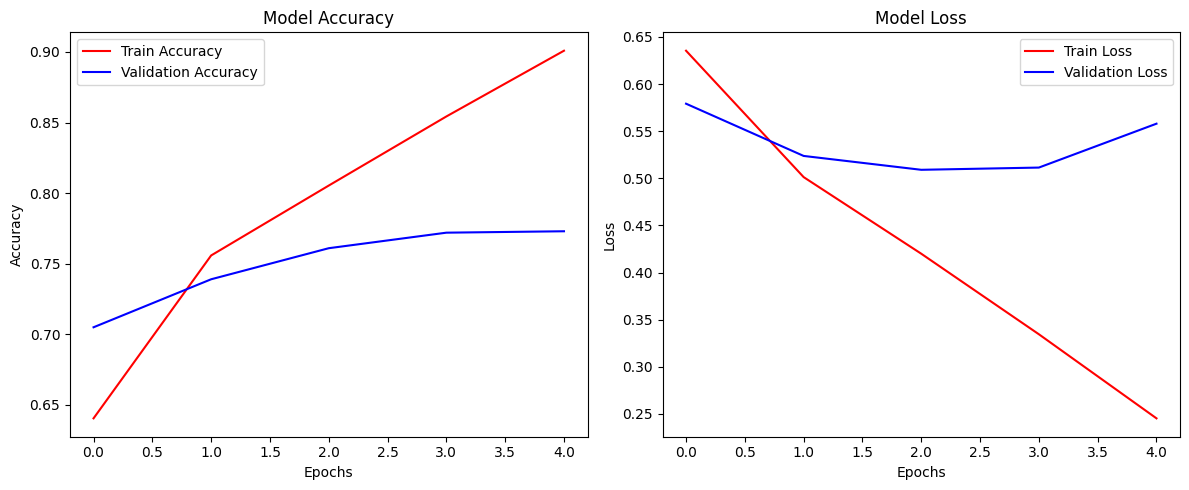

In [8]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [16]:
import cv2
image1=cv2.imread('./cat.jpg')
plt.imshow(image1)
image1=cv2..resize(image1,(256,256))
image1_test=image1.reshape((1,256,256,3))
model.predict(image1_test)

SyntaxError: invalid syntax (3669558553.py, line 4)

In [24]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load the image as RGB and resize to match model input
img = load_img('./cat.jpg', target_size=(128, 128))  # RGB by default
img = img_to_array(img) / 255.0                      # Normalize to [0,1]
img = np.expand_dims(img, axis=0)                    # (1, 128, 128, 3)

# Predict
prediction = model.predict(img)

# Optional: Print prediction result (for binary classification)
if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: Cat


In [25]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.3458225]], dtype=float32)

In [29]:
model.save('cat_dog_model.keras')
